# Data Science From Scratch - Joel Grus
# Chapter 5 - Statistics
### Decribing a single set of data

In [1]:
# Simple dataset
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,
               15,15,14,14,13,13,13,13,12,12,11,10,10,10,
               10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,
               9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,
               8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,
               6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,
               5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,
               4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,
               3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,
               2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
               1,1,1,1,1,1,1,1]


#### Simple histogram

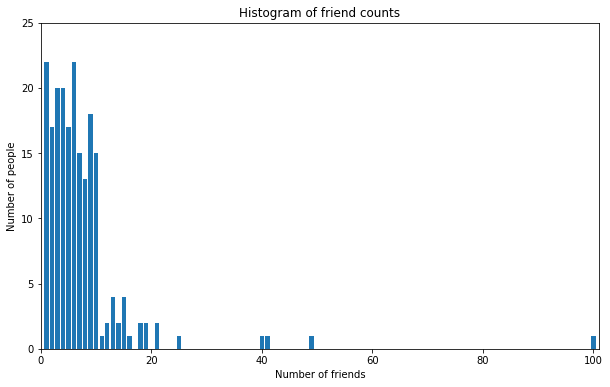

In [2]:
import matplotlib.pyplot as plt
from collections import Counter

friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]

plt.figure(figsize = (10,6))
plt.bar(xs, ys)
plt.axis([0, 101, 0 , 25])
plt.title("Histogram of friend counts")
plt.xlabel("Number of friends")
plt.ylabel("Number of people")
plt.show()

In [3]:
# Number of data points
num_points = len(num_friends)
num_points

204

In [4]:
# Largest value
largest_value = max(num_friends)
largest_value

100

In [5]:
# Smallest value
smallest_value = min(num_friends)
smallest_value

1

In [6]:
# Another way
sorted_values = sorted(num_friends)
sorted_values[0] # smallest value

1

In [7]:
sorted_values[-1] # largest value

100

In [8]:
sorted_values[-2] # second largest value, etc

49

### Central Tendencies

#### Mean

In [9]:
def mean(x):
    return sum(x) / len(x)

mean(num_friends)

7.333333333333333

#### Median

In [10]:
def median(v):
    n = len(v)
    sorted_v = sorted(v)
    mid_point = n // 2

    if n % 2 == 1:
        # Odd, so return mid-point
        return sorted_v[mid_point]
    else:
        lo = mid_point - 1
        hi = mid_point
        return (sorted_v[lo] + sorted_v[hi]) / 2

median(num_friends)

6.0

#### Quantile

In [11]:
def quantile(x, p):
    """Returns the pth-percentile value in x."""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

for percentile in [.1, .25, .75, .9]:
    print(percentile, "=", quantile(num_friends, percentile))

0.1 = 1
0.25 = 3
0.75 = 9
0.9 = 13


#### Mode

In [12]:
def mode(x):
    """Returns a list a may be more than one mode."""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

mode(num_friends)

[6, 1]

### Dispersion
How spread out data is.

#### Simple range

In [13]:
def data_range(x):
    return max(x) - min(x)

data_range(num_friends)

99

#### Variance

In [14]:
def de_mean(x):
    """Translate x by subtracting its mean, so result has mean 0."""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

from chapter_04 import sum_of_squares

def variance(x):
    """Assumes x has at least 2 elements."""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

variance(num_friends)

81.54351395730716

#### Standard Deviation

In [15]:
import math

def standard_deviation(x):
    return math.sqrt(variance(x))

standard_deviation(num_friends)

9.03014473623248

#### Interquartile range

In [16]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

interquartile_range(num_friends)

6

### Correlation
#### Covariance

In [17]:
# Secondary vector of data to compare with num_friends
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,
                 54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,
                 35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,
                 20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,
                 32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,
                 36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,
                 36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,
                 35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,
                 31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,
                 16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,
                 41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,
                 29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,
                 36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,
                 27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,
                 18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,
                 27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,
                 24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,
                 27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,
                 15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

In [18]:
from chapter_04 import dot

def covariance(x, y):
    n = len(x) # Same a len(y) as both are features of same dataset.
    return dot(de_mean(x), de_mean(y)) / (n - 1)

covariance(num_friends, daily_minutes)

22.425435139573064

#### Correlation
Units of *covariance* can be hard to interpret because:
* It is one arbitrary feature multiplied by another (in this case friends * minutes) - there is not necessearily an intuitive concept of what these units are.
* Applying a scalar to one of the features would mean that the relationship would effectively be the same, but the value for covariance would increase/decrease in proportion to the scalar.

Hence it is more effective to use *correlation* - which is unitless and always lies between -1 (perfect negative correlation) and 1 (perfect positive correlation).

In [19]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # Correlation is zero if no variation.

correlation(num_friends, daily_minutes)

0.24736957366478218

#### Checking for & removing Outliers

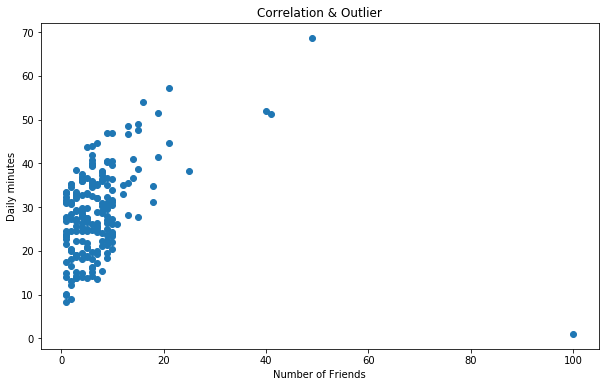

In [20]:
# Plotting the correlation we see 1 extreme outlier in bottom right corner.
plt.figure(figsize = (10, 6))
plt.scatter(x = num_friends, y = daily_minutes)
plt.xlabel("Number of Friends")
plt.ylabel("Daily minutes")
plt.title("Correlation & Outlier")
plt.show()

In [21]:
# We can remove outlier
outlier = num_friends.index(100) # Index of outlier

num_friends_good = [x for i, x in enumerate(num_friends)
                   if i != outlier]

daily_minutes_good = [x for i, x in enumerate(daily_minutes)
                     if i != outlier]

correlation(num_friends_good, daily_minutes_good)

0.5736792115665573

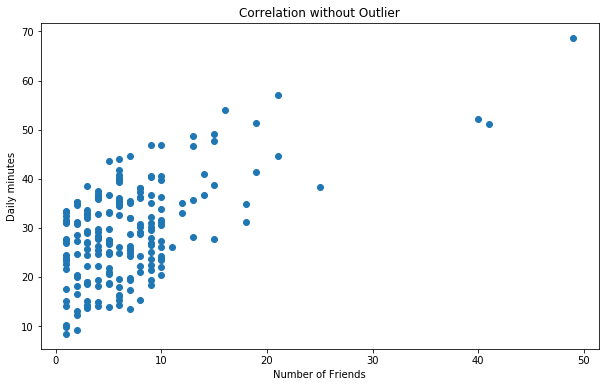

In [22]:
# Much stronger correlation without the outlier.
plt.figure(figsize = (10, 6))
plt.scatter(x = num_friends_good, y = daily_minutes_good)
plt.xlabel("Number of Friends")
plt.ylabel("Daily minutes")
plt.title("Correlation without Outlier")
plt.show()

### Simpson's Paradox (example)
Sometimes apparent correlations can be obscuring deeper truths within the data, the results of which can seem paradoxical. For example, imagine the data was grouped between East Coast and West Coast, showing the average number of friends for those in each bucket:

|Coast|Number Members|Average Number Friends|
|-|-|-|
|West|101|8.2|
|East|103|6.5|

On first appearance it seems that the 'truth' of the data is that West Coast people have more friends on average.

However you then group the data further, by whether or not they have a PhD:

|Coast|Degree|Number Members|Average Number Friends|
|-|-|-|-|
|West|PhD|35|3.1|
|East|PhD|70|3.2|
|West|No PhD|66|10.9|
|East|No PhD|33|13.4|

In this breakdown it looks like the opposite result has appeared - now in both subcategories of 'Phd' and 'No PhD', East Coast people have a higher number of friends, which seems to completely contradict the original result.

The explanation here is that the bucket of East Coast people is heavily skewed towards having a PhD, which has a much lower average number of friends for both East and West. So even though it slightly beats out West in the both buckets, because West has a much higher proportion of its people in the high friend count 'No PhD' bucket, its overall average is higher.

##### The lesson is that you have to know your data, and even if you think there is an obvious result in the first place, you need to make sure you check for any potential confounding variables.

### Other Correlational Caveats
A correlation of 0 indicates no linear relationship between variables, but doesn't necessarily mean there is no relationship. For example:

In [23]:
x = [-2, -1, 0, 1, 2]
y = [2, 1, 0, 1, 2]
correlation(x, y)

0.0

##### The correlation is 0, but there is a clear relationship (y is the absolute value of x).

In addition the correlation may be perfect, but it tells you nothing about the how large the relationship is, for example:

In [24]:
x_1 = [-2, 1, 0, 1, 2]
y_1 = [99.98, 99.99, 100, 100.01, 100.02]
correlation(x_1, y_1)

0.8340576562281805

### Correlation != Causation
Remember that correlation does not imply causation by itself. Considering the relationship explored above (number of friends & daily minutes spent on site), it could be:

* Those with more friends see more content appear, which causes them to spend longer on site.
* Those who spend longer on the site get into more discussions with people, which causes them to forge more friendships.
* Those who are most passionate about the site's subject matter are both more likely to spend more time on the site, and more likely to interact with like-minded people.

One way to feel more confident about causality is to conduct randomised tests; e.g. randomly select 2 groups of users with similar demographics, and show 1 group only a fraction of their friends' content. If that groups number of minutes on the site decreases in a significant way, then you have more confidence about number of friends causing more time on the site.